# Pythonプログラミング入門 第5回
csv ファイルの入出力について説明します

# csv ファイルの読み込み
csv ファイルを読み書きするには、
ファイルをオープンして、そのオブジェクトから、
csv のリーダーを作ります。
csv のリーダーとは、csv ファイルからデータを読み込むためのオブジェクトで、
このオブジェクトのメソッドを呼び出すことにより、csv ファイルからデータを読み込むことができます。

In [2]:
import csv
f = open('small.csv', 'r')
dataReader = csv.reader(f)

In [3]:
type(dataReader)

_csv.reader

In [3]:
dir(dataReader)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'dialect',
 'line_num']

このオブジェクトもイテレータで、next という関数を呼び出すことができます。

In [4]:
next(dataReader)

['11', '12', '13', '14', '15']

このようにして csv ファイルを読むと、
csv ファイルの各行のデータが文字列の配列となって返されます。

In [5]:
next(dataReader)

['21', '22', '23', '24', '25']

In [6]:
row = next(dataReader)

In [7]:
row

['31', '32', '33', '34', '35']

In [8]:
row[2]

'33'

In [9]:
int(row[2])

33

文字列を整数に変換するには、int を関数として用いればよいです。

In [10]:
next(dataReader)

StopIteration: 

ファイルの終わりまできましたので、上のようにエラーになります。

In [11]:
f.close()

# csv ファイルに対する for 文
csv のリーダーもイテレータですので、for 文の in の後に書くことができます。

---
```Python
for row in dataReader:
    ...
```
---

繰り返しの各ステップで、next(dataReader) が呼び出されて、
row にその値が設定され、for 文の中身が実行されます。

In [4]:
f = open('small.csv', 'r')
dataReader = csv.reader(f)
for row in dataReader:
    print(row)
f.close()

['11', '12', '13', '14', '15']
['21', '22', '23', '24', '25']
['31', '32', '33', '34', '35']


# csv ファイルに対する with 文
以下はwith文を使った例です。

In [13]:
with open('small.csv', 'r') as f:
    dataReader = csv.reader(f)
    for row in dataReader:
        print(row)

['11', '12', '13', '14', '15']
['21', '22', '23', '24', '25']
['31', '32', '33', '34', '35']


# csv ファイルの書き込み

csv ファイルを作成して書き込むには、csv のライターを作ります。
csv のライターとは、csv ファイルを作ってデータを書き込むためのオブジェクトで、
このオブジェクトのメソッドを呼び出すことにより、csv ファイルにデータが書き込まれます。

In [39]:
f = open('out.csv', 'w')

In [40]:
dataWriter = csv.writer(f, lineterminator='\n')

In [34]:
dir(dataWriter)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'dialect',
 'writerow',
 'writerows']

In [43]:
dataWriter.writerow([1,2,3])

6

In [46]:
dataWriter.writerow([21,22,23])

9

In [47]:
f.close()

with文を使うこともできます。

In [38]:
with open('out.csv', 'w') as f:
    dataWriter = csv.writer(f, lineterminator='\n')
    dataWriter.writerow([1,2,3])
    dataWriter.writerow([21,22,23])

# 東京の7月の気温
tokyo-temps.csv には、気象庁のオープンデータからダウンロードした、
東京の7月の平均気温のデータが入っています。

http://www.data.jma.go.jp/gmd/risk/obsdl/

48行目の第2列に1875年7月の平均気温が入っており、
以下、2016年まで、12行ごとに7月の平均気温が入っています。

以下は、これを取り出す Python の簡単なコードです。

In [48]:
import csv

with open('tokyo-temps.csv', 'r', encoding='sjis') as f:
    dataReader = csv.reader(f)
    n=0
    year = 1875
    years = []
    july_temps = []
    for row in dataReader:
        n = n+1
        if n>=48 and (n-48)%12 == 0:
            years.append(year)
            july_temps.append(float(row[1]))
            year = year + 1

ファイルをオープンするときに、キーワード引数の encoding が指定されています。
この引数で、ファイルの符号を指定します。
'sjis' はシフトJISを意味します。この他に、'utf-8'（8ビットのUnicode）があります。

変数 years に年の配列、変数 july_temps に対応する年の7月の平均気温の配列が設定されます。

In [49]:
years

[1875,
 1876,
 1877,
 1878,
 1879,
 1880,
 1881,
 1882,
 1883,
 1884,
 1885,
 1886,
 1887,
 1888,
 1889,
 1890,
 1891,
 1892,
 1893,
 1894,
 1895,
 1896,
 1897,
 1898,
 1899,
 1900,
 1901,
 1902,
 1903,
 1904,
 1905,
 1906,
 1907,
 1908,
 1909,
 1910,
 1911,
 1912,
 1913,
 1914,
 1915,
 1916,
 1917,
 1918,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016]

In [50]:
july_temps

[26.0,
 24.3,
 26.5,
 26.0,
 26.1,
 24.2,
 24.0,
 24.2,
 23.7,
 23.4,
 23.1,
 25.0,
 23.6,
 24.5,
 23.4,
 23.5,
 24.9,
 25.7,
 25.3,
 26.8,
 22.1,
 24.1,
 22.9,
 25.9,
 23.2,
 22.8,
 22.1,
 21.8,
 23.2,
 24.8,
 23.3,
 23.5,
 22.7,
 22.1,
 24.3,
 23.0,
 24.5,
 24.3,
 23.3,
 25.5,
 24.2,
 23.9,
 25.7,
 26.0,
 23.6,
 26.1,
 24.3,
 25.0,
 24.0,
 26.1,
 23.2,
 24.6,
 26.0,
 23.4,
 25.9,
 26.3,
 21.8,
 25.7,
 26.6,
 23.9,
 24.3,
 24.9,
 26.3,
 25.0,
 26.5,
 26.9,
 23.7,
 27.5,
 25.1,
 25.6,
 22.0,
 26.2,
 25.7,
 26.0,
 25.3,
 26.5,
 24.3,
 24.3,
 24.7,
 22.3,
 27.6,
 24.2,
 24.4,
 24.9,
 26.1,
 25.8,
 27.4,
 25.1,
 25.7,
 25.5,
 24.2,
 24.4,
 26.3,
 24.7,
 25.0,
 25.4,
 25.8,
 25.2,
 26.1,
 23.4,
 25.6,
 23.9,
 25.8,
 27.8,
 25.2,
 23.8,
 26.3,
 23.1,
 23.8,
 26.2,
 26.3,
 23.9,
 27.0,
 22.4,
 24.1,
 25.7,
 26.7,
 25.5,
 22.5,
 28.3,
 26.4,
 26.2,
 26.6,
 25.3,
 25.9,
 27.7,
 28.5,
 28.0,
 22.8,
 28.5,
 25.6,
 25.6,
 24.4,
 27.0,
 26.3,
 28.0,
 27.3,
 26.4,
 27.3,
 26.8,
 26.2,
 25.4]

ここでは詳しく説明しませんが、線形回帰によるフィッティングを行ってみましょう。

In [51]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

fitp = numpy.poly1d(numpy.polyfit(years, july_temps, 1))
ma = max(years)
mi = min(years)
xp = numpy.linspace(mi, ma, (ma - mi))

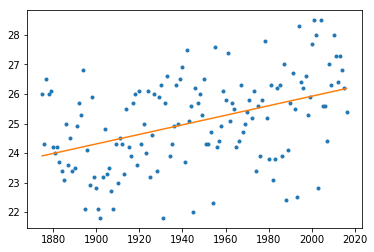

In [52]:
plt.plot(years, july_temps, '.', xp, fitp(xp), '-')
plt.show()

# 練習

1. tokyo-temps.csv を読み込んで、各行が西暦年と7月の気温のみからなる csv ファイルを作成してください。<br>
西暦年は1875から2016までとします。

2. 作成した csv ファイルを Excel から読み込んで確認してください。

In [1]:
import csv

with open('tokyo-temps.csv', 'r', encoding='sjis') as f:
    dataReader = csv.reader(f)
    n=0
    year = 1875
    years_and_july_temps = []
    for row in dataReader:
        n = n+1
        if n>=48 and (n-48)%12 == 0:
            years_and_july_temps.append(year)
            years_and_july_temps.append(float(row[1]))
            years_and_july_temps.append("\r")
            year = year + 1
            
years_and_july_temps

with open('years_and_july_temps.csv', 'w') as f:
    dataWriter = csv.writer(f,lineterminator='\n')
    dataWriter.writerow(years_and_july_temps)

# 予習課題

1. 整数のみからなる csv ファイルの名前をもらって、csv ファイルの各行を読み込んで整数のリストを作り、
ファイル全体の内容を、そのようなリストのリストとして返す関数 csv_matrix(name) を定義してください。

In [1]:
#「リストのリスト」という言葉の意味が分からなかったのですが、このような解釈で合っていますでしょうか。

import csv

def csv_matrix(name):
    with open(name, 'r') as f:
        dataReader = csv.reader(f)
        matrix = []
        for row in dataReader:
            matrix.append(row)
    return matrix

In [2]:
csv_matrix('small.csv')

[['11', '12', '13', '14', '15'],
 ['21', '22', '23', '24', '25'],
 ['31', '32', '33', '34', '35']]

In [5]:
csv_matriw('small.csv')(row)

NameError: name 'csv_matriw' is not defined